In [ ]:
# Displaying the new 2022 ward boundaries as a quick visual check.

In [2]:
# Dependencies
!pip install --upgrade geopandas

     |████████████████████████████████| 1.0 MB 9.4 MB/s 
     |████████████████████████████████| 6.3 MB 14.8 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 


In [5]:
import os

import geopandas as gpd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive

Data
==


GDrive mount
--

In [6]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [31]:
project_dir = '/content/gdrive/MyDrive/WardProfiles'
oa_dir = f"{project_dir}/boundaries/oa"
ward_dir = f"{project_dir}/boundaries/2022_wards"
ward_lookups_dir = f"{project_dir}/lookups/2022_wards"

# Outputs
out_dir = f"{project_dir}/maps/2022_wards/boundaries"

In [32]:
!mkdir -p "{out_dir}"

In [9]:
!ls -lh "{oa_dir}"/lbl_oa*.gpkg

-rw------- 1 root root 420K Nov  1 13:41 /content/gdrive/MyDrive/WardProfiles/boundaries/oa/lbl_oa11_20m.gpkg
-rw------- 1 root root 188K Nov  1 13:41 /content/gdrive/MyDrive/WardProfiles/boundaries/oa/lbl_oa11_centroids.gpkg
-rw------- 1 root root 3.7M Nov  1 13:41 /content/gdrive/MyDrive/WardProfiles/boundaries/oa/lbl_oa11_full.gpkg


In [10]:
!ls -lh "{ward_dir}" 

total 55M
-rw------- 1 root root 5.2K Nov  1 14:55 lbl_lsoa11_wd22_proposed.csv
-rw------- 1 root root 1.2K Nov  1 14:55 lbl_msoa11_wd22_proposed.csv
-rw------- 1 root root  28K Nov  1 14:55 lbl_oa11_wd22_proposed.csv
-rw------- 1 root root 537K Nov  1 14:53 lbl_wd22_proposed.geojson
-rw------- 1 root root 292K Nov  1 14:53 lbl_wd22_proposed.gpkg
drwx------ 2 root root 4.0K Nov  1 14:53 lbl_wd22_proposed_shp
-rw------- 1 root root  78K Nov  1 14:54 lbl_wd22_proposed_shp.zip
drwx------ 2 root root 4.0K Nov 11 13:33 maps
-rw------- 1 root root  54M Jul  9 02:57 Wards_for_2023_review_SHP.zip


In [12]:
!ls -lh "{ward_lookups_dir}" 

total 35K
-rw------- 1 root root 5.2K Nov  2 14:12 lbl_lsoa11_wd22_proposed.csv
-rw------- 1 root root 1.2K Nov  2 14:12 lbl_msoa11_wd22_proposed.csv
-rw------- 1 root root  28K Nov  2 14:11 lbl_oa11_wd22_proposed.csv


Ward geometry
--

In [13]:
# Ward22 geometry
wd22 = gpd.read_file(f"{ward_dir}/lbl_wd22_proposed.gpkg")
len(wd22)

19

OA11-WD22 mapping
--


In [14]:
# OA geometry
oa11 = gpd.read_file(f"{oa_dir}/lbl_oa11_20m.gpkg")
len(oa11)

887

In [15]:
# OA11-WD22 lookup table
oa11_wd22 = pd.read_csv(f"{ward_lookups_dir}/lbl_oa11_wd22_proposed.csv")

In [16]:
# Join & dissolve
oa_wards = oa11.merge(oa11_wd22, on='OA11CD').dissolve(by='WD22CD_proposed')

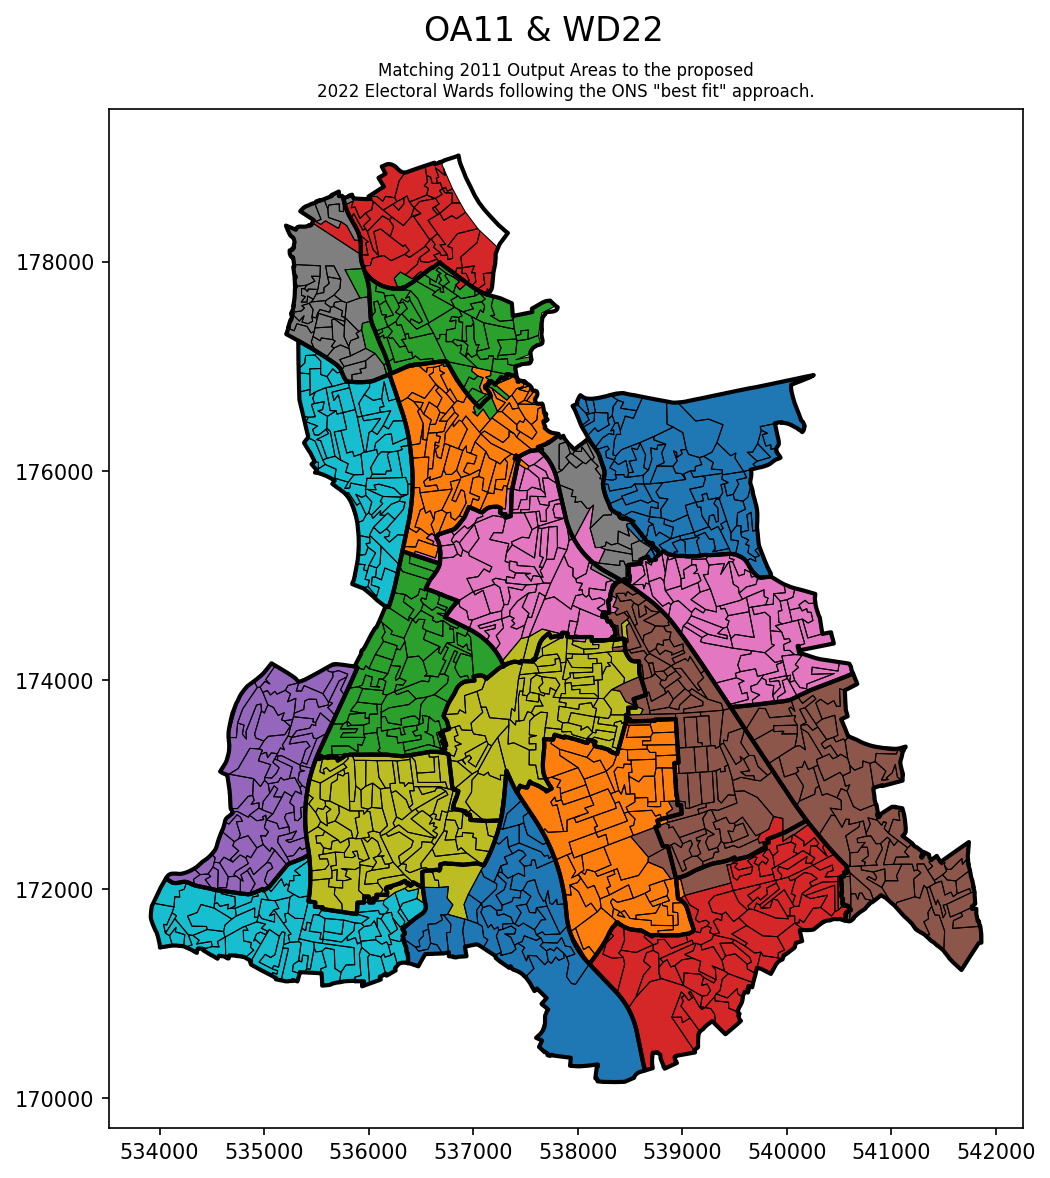

In [33]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150)
plt.suptitle('OA11 & WD22', fontsize=16, y=.95)
plt.title('Matching 2011 Output Areas to the proposed\n2022 Electoral Wards following the ONS "best fit" approach.', fontsize=8)
oa_wards.plot(ax=ax, column='WD22NM_proposed') # Shade by ward name
oa11.plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='black')
wd22.plot(ax=ax, facecolor='none', linewidth=2, edgecolor='black')

plt.savefig(f"{out_dir}/lbl_oa11_wd22_proposed-test.png", dpi=600)
plt.savefig(f"{out_dir}/lbl_oa11_wd22_proposed-test.pdf")

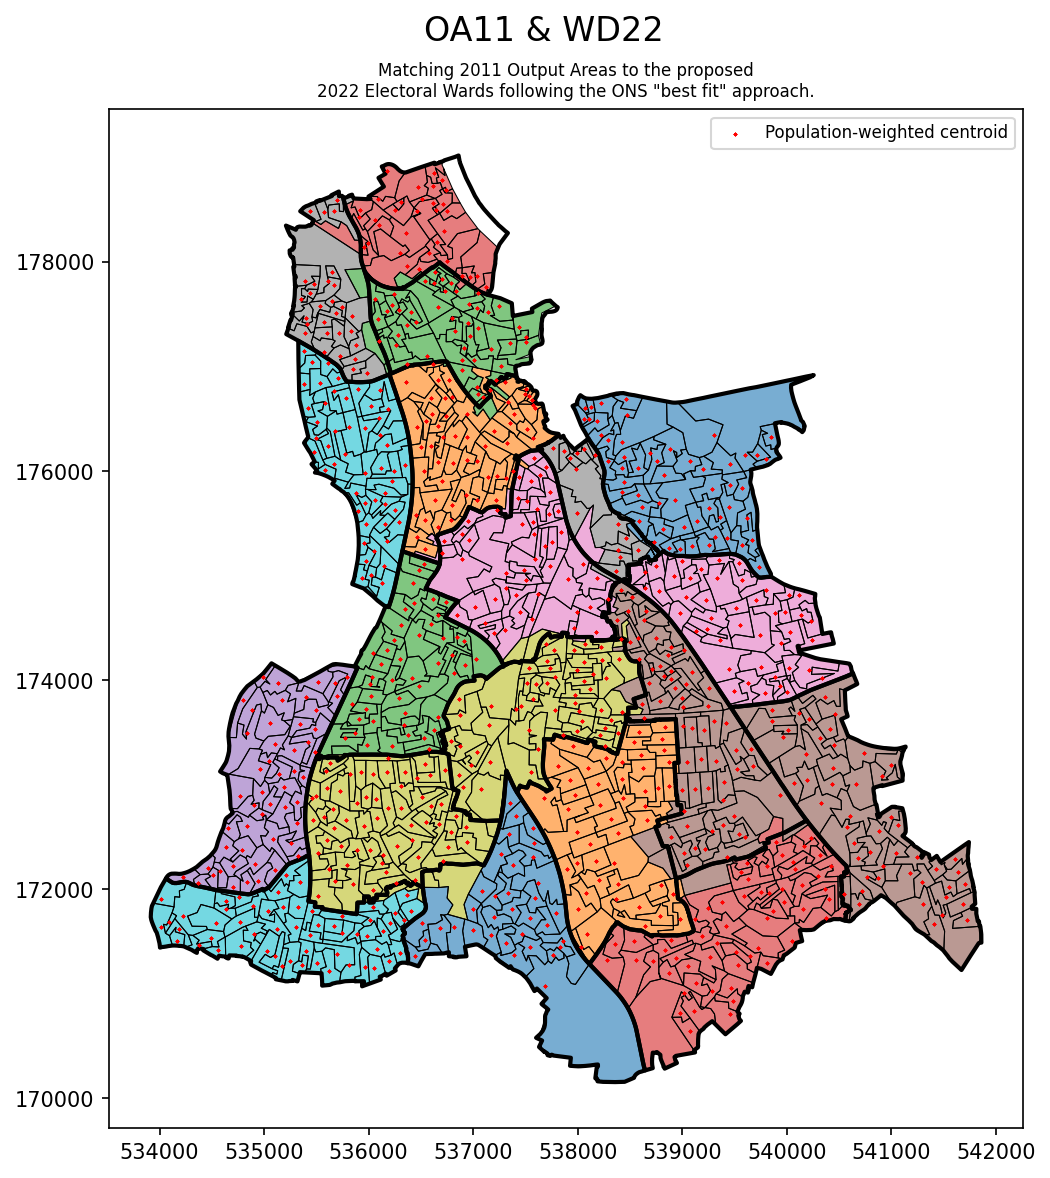

In [34]:
# Higher resolution, also showing centroids
oa11cen = gpd.read_file(f"{oa_dir}/lbl_oa11_centroids.gpkg")

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150)
plt.suptitle('OA11 & WD22', fontsize=16, y=.95)
plt.title('Matching 2011 Output Areas to the proposed\n2022 Electoral Wards following the ONS "best fit" approach.', fontsize=8)
oa_wards.plot(ax=ax, column='WD22NM_proposed', alpha=0.6) # Shade by ward name
oa11.plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='black')
wd22.plot(ax=ax, facecolor='none', linewidth=2, edgecolor='black')
oa11cen.plot(ax=ax, markersize=1, marker='x', color='red', 
             label='Population-weighted centroid', 
             legend=True, legend_kwds={'loc': 'upper right'})
ax.legend(fontsize=8)

plt.savefig(f"{out_dir}/lbl_oa11_wd22_proposed-test_centroids.png", dpi=600)
plt.savefig(f"{out_dir}/lbl_oa11_wd22_proposed-test_centroids.pdf")

LSOA11-WD22 mapping
--


In [35]:
# OA geometry
lsoa11 = gpd.read_file(f"{oa_dir}/lbl_lsoa11_20m.gpkg")
len(lsoa11)

169

In [36]:
# OA11-WD22 lookup table
lsoa11_wd22 = pd.read_csv(f"{ward_lookups_dir}/lbl_lsoa11_wd22_proposed.csv")

In [37]:
# Join & dissolve
lsoa_wards = lsoa11.merge(lsoa11_wd22, on='LSOA11CD').dissolve(by='WD22CD_proposed')

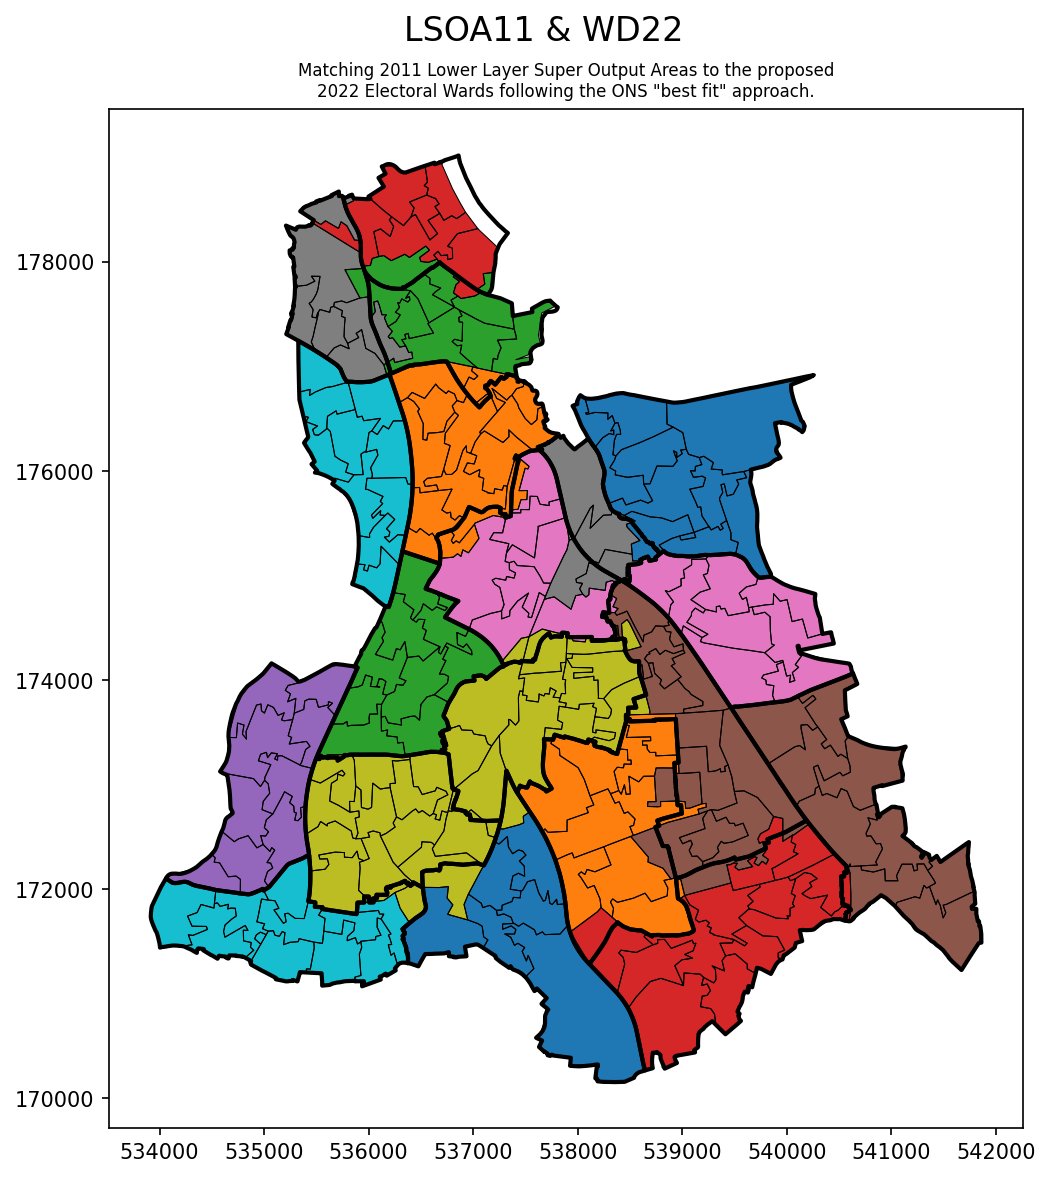

In [38]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150)
plt.suptitle('LSOA11 & WD22', fontsize=16, y=.95)
plt.title('Matching 2011 Lower Layer Super Output Areas to the proposed\n2022 Electoral Wards following the ONS "best fit" approach.', fontsize=8)
lsoa_wards.plot(ax=ax, column='WD22NM_proposed') # Shade by ward name
lsoa11.plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='black', label=None)
wd22.plot(ax=ax, facecolor='none', linewidth=2, edgecolor='black')

plt.savefig(f"{out_dir}/lbl_lsoa11_wd22_proposed-test.png", dpi=600)
plt.savefig(f"{out_dir}/lbl_lsoa11_wd22_proposed-test.pdf")

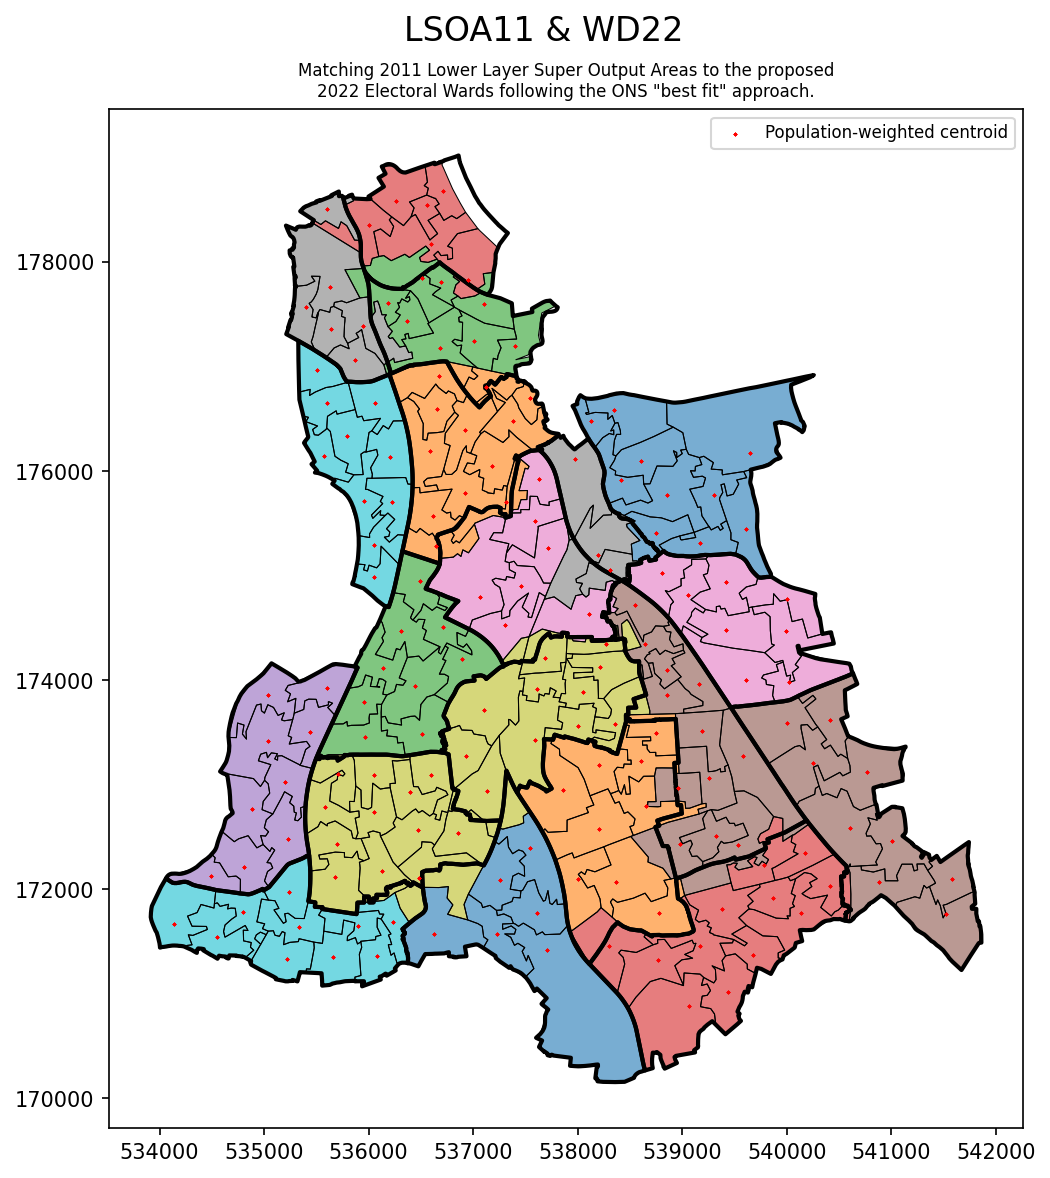

In [39]:
# Higher resolution, also showing centroids
lsoa11cen = gpd.read_file(f"{oa_dir}/lbl_lsoa11_centroids.gpkg")

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150)
plt.suptitle('LSOA11 & WD22', fontsize=16, y=.95)
plt.title('Matching 2011 Lower Layer Super Output Areas to the proposed\n2022 Electoral Wards following the ONS "best fit" approach.', fontsize=8)
lsoa_wards.plot(ax=ax, column='WD22NM_proposed', alpha=0.6) # Shade by ward name
lsoa11.plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='black')
wd22.plot(ax=ax, facecolor='none', linewidth=2, edgecolor='black')
lsoa11cen.plot(ax=ax, markersize=1, marker='x', color='red', 
               label='Population-weighted centroid', 
               legend=True, legend_kwds={'loc': 'upper right'})
ax.legend(fontsize=8)

plt.savefig(f"{out_dir}/lbl_lsoa11_wd22_proposed-test_centroids.png", dpi=600)
plt.savefig(f"{out_dir}/lbl_lsoa11_wd22_proposed-test_centroids.pdf")

MSOA11-WD22 mapping
--


In [40]:
# OA geometry
msoa11 = gpd.read_file(f"{oa_dir}/lbl_msoa11_20m.gpkg")
len(msoa11)

36

In [41]:
# OA11-WD22 lookup table
msoa11_wd22 = pd.read_csv(f"{ward_lookups_dir}/lbl_msoa11_wd22_proposed.csv")

In [42]:
# Join & dissolve
msoa_wards = msoa11.merge(msoa11_wd22, on='MSOA11CD').dissolve(by='WD22CD_proposed')

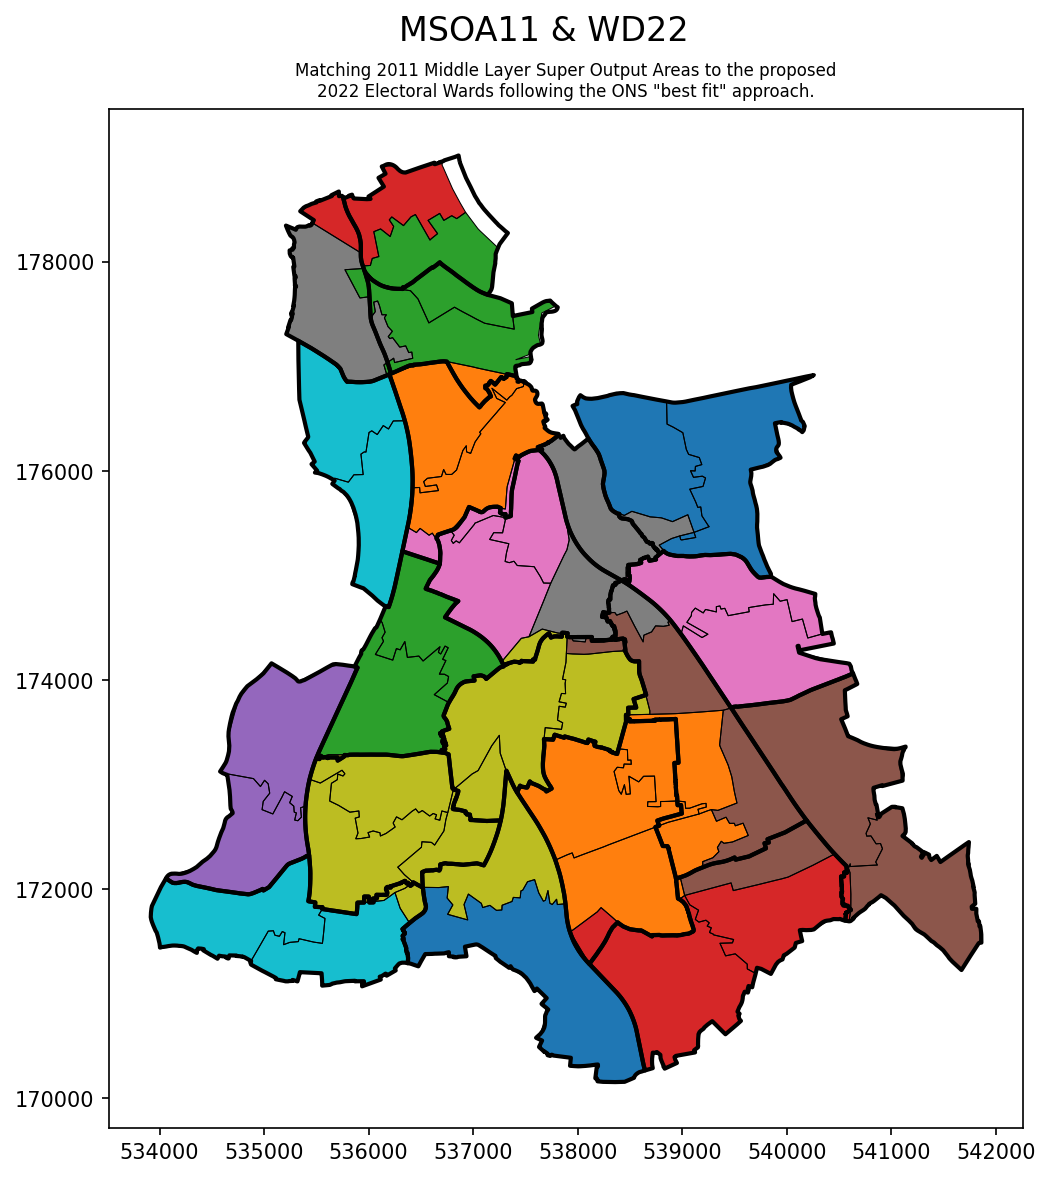

In [43]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150)
plt.suptitle('MSOA11 & WD22', fontsize=16, y=.95)
plt.title('Matching 2011 Middle Layer Super Output Areas to the proposed\n2022 Electoral Wards following the ONS "best fit" approach.', fontsize=8)
msoa_wards.plot(ax=ax, column='WD22NM_proposed') # Shade by ward name
msoa11.plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='black')
wd22.plot(ax=ax, facecolor='none', linewidth=2, edgecolor='black')

plt.savefig(f"{out_dir}/lbl_msoa11_wd22_proposed-test.png", dpi=600)
plt.savefig(f"{out_dir}/lbl_msoa11_wd22_proposed-test.pdf")

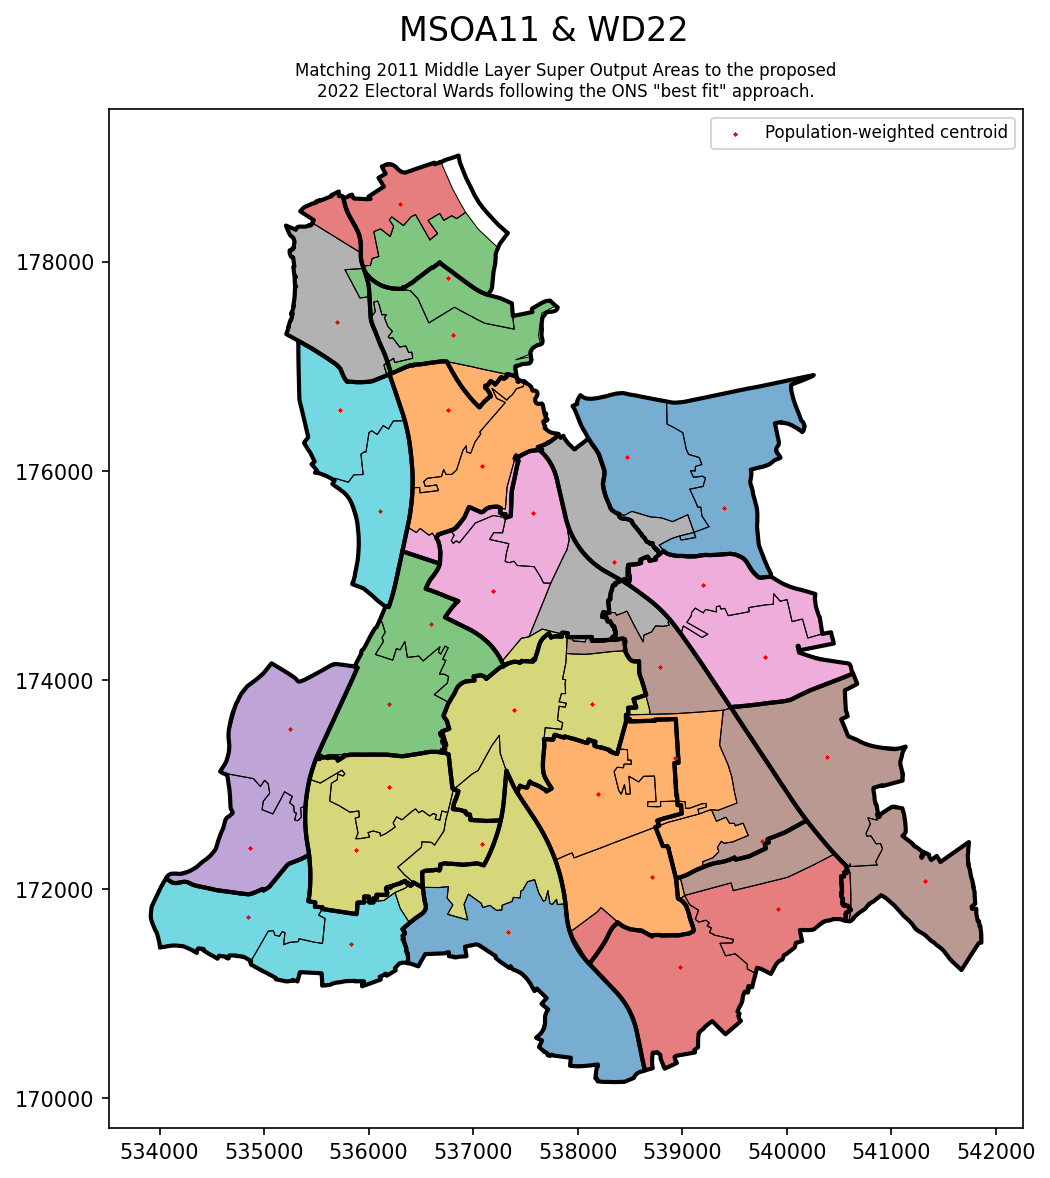

In [44]:
# Higher resolution, also showing centroids
msoa11cen = gpd.read_file(f"{oa_dir}/lbl_msoa11_centroids.gpkg")

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150)
plt.suptitle('MSOA11 & WD22', fontsize=16, y=.95)
plt.title('Matching 2011 Middle Layer Super Output Areas to the proposed\n2022 Electoral Wards following the ONS "best fit" approach.', fontsize=8)
msoa_wards.plot(ax=ax, column='WD22NM_proposed', alpha=0.6) # Shade by ward name
msoa11.plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='black')
wd22.plot(ax=ax, facecolor='none', linewidth=2, edgecolor='black')
msoa11cen.plot(ax=ax, markersize=1, marker='x', color='red', 
               label='Population-weighted centroid', 
               legend=True, legend_kwds={'loc': 'upper right'})
ax.legend(fontsize=8)

plt.savefig(f"{out_dir}/lbl_msoa11_wd22_proposed-test_centroids.png", dpi=600)
plt.savefig(f"{out_dir}/lbl_msoa11_wd22_proposed-test_centroids.pdf")